In [1]:
# Part 1 - Building the CNN
#importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense, Dropout
from keras import optimizers
import tensorflow as tf

# Initialing the CNN
classifier = Sequential()

# Step 1 - Convolution Layer 
classifier.add(Convolution2D(32, (3,  3), input_shape = (64, 64, 3), activation = 'relu'))
#step 2 - Pooling
classifier.add(MaxPooling2D(pool_size =(2,2) ) )

# Adding second convolution layer
classifier.add(Convolution2D(32, (3,  3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size =(2,2) ))

#Adding 3rd Concolution Layer
classifier.add(Convolution2D(64, (3,  3), activation = 'relu' ))
classifier.add(MaxPooling2D(pool_size =(2,2)) )


#Step 3 - Flattening
classifier.add(Flatten())

#Step 4 - Full Connection
classifier.add(Dense(256, activation = 'relu'))
classifier.add(Dropout(0.5))
classifier.add(Dense(2, activation = 'softmax'))

#Compiling The CNN
classifier.compile(
                      optimizer = tf.keras.optimizers.SGD(learning_rate = 0.01),
                      loss = 'categorical_crossentropy',
                      metrics = ['accuracy']
                  )

In [2]:

# fullpath= "C:\\Users\\91812\\Downloads\\Face-Mask-Detection\\Face-Mask-Detection-master\\dataset\training_set"

# import splitfolders  

# # The path to the directory where the original dataset was uncompressed
# input_folder = "C:\\Users\\91812\\Downloads\\Face-Mask-Detection\\Face-Mask-Detection-master\\dataset\\withmask"

# output_folder = "C:\\Users\\91812\\Downloads\\Face-Mask-Detection\\Face-Mask-Detection-master\\dataset\\withmask"

# splitfolders.ratio(input_folder, output_folder, seed=1337, ratio=(.8, .2), group_prefix=None) 

In [3]:

# fullpath= "C:\\Users\\91812\\Downloads\\Face-Mask-Detection\\Face-Mask-Detection-master\\dataset\training_set"

# import splitfolders  

# # The path to the directory where the original dataset was uncompressed
# input_folder = "C:\\Users\\91812\\Downloads\\Face-Mask-Detection\\Face-Mask-Detection-master\\dataset\\withoutmask"

# output_folder = "C:\\Users\\91812\\Downloads\\Face-Mask-Detection\\Face-Mask-Detection-master\\dataset\\withoutmask"

# splitfolders.ratio(input_folder, output_folder, seed=1337, ratio=(.8, .2), group_prefix=None) 

In [9]:

#Part 2 Fittting the CNN to the image
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory(
        'C:\\Users\\91812\\Downloads\\Face-Mask-Detection\\Face-Mask-Detection-master\\dataset\\train\\',
        target_size=(64, 64),
        batch_size=32,
        class_mode='categorical')

test_set = test_datagen.flow_from_directory(
        'C:\\Users\\91812\\Downloads\\Face-Mask-Detection\\Face-Mask-Detection-master\\dataset\\test\\',
        target_size=(64, 64),
        batch_size=32,
        class_mode='categorical')

#print(training_set)
training_set.class_indices

Found 3273 images belonging to 2 classes.
Found 819 images belonging to 2 classes.


{'mask': 0, 'no_mask': 1}

In [5]:
# from tensorflow.keras.callbacks import ModelCheckpoint

# checkpoint_filepath = 'C:\\Users\\91812\\Downloads\\Face-Mask-Detection\\Face-Mask-Detection-master\\Trained_model.h5'

# model_checkpoint_callback = 
#                     tf.keras.callbacks.ModelCheckpoint(
#                         filepath=checkpoint_filepath,
#                         save_weights_only=True,
#                         monitor='val_accuracy',
#                         mode='max',
#                         save_best_only=True)


model = classifier.fit(
        training_set,
        epochs=25,
        validation_data = test_set,
        # callbacks=[model_checkpoint_callback],
        verbose=1
      )

Epoch 1/25
 20/103 [====>.........................] - ETA: 24s - loss: 0.6902 - accuracy: 0.5406

C:\Users\91812\anaconda3\lib\site-packages\PIL\Image.py:945: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


103/103 [==============================] - 46s 407ms/step - loss: 0.6560 - accuracy: 0.6355 - val_loss: 0.6115 - val_accuracy: 0.6288
Epoch 2/25
103/103 [==============================] - 22s 210ms/step - loss: 0.5440 - accuracy: 0.7556 - val_loss: 0.6869 - val_accuracy: 0.6093
Epoch 3/25
103/103 [==============================] - 21s 199ms/step - loss: 0.4318 - accuracy: 0.8133 - val_loss: 0.3690 - val_accuracy: 0.8669
Epoch 4/25
103/103 [==============================] - 21s 202ms/step - loss: 0.3504 - accuracy: 0.8647 - val_loss: 0.3676 - val_accuracy: 0.8620
Epoch 5/25
103/103 [==============================] - 21s 200ms/step - loss: 0.3151 - accuracy: 0.8781 - val_loss: 0.4593 - val_accuracy: 0.8095
Epoch 6/25
103/103 [==============================] - 21s 199ms/step - loss: 0.3032 - accuracy: 0.8873 - val_loss: 0.3337 - val_accuracy: 0.8632
Epoch 7/25
103/103 [==============================] - 20s 196ms/step - loss: 0.3025 - accuracy: 0.8888 - val_loss: 0.3167 - val_accuracy: 0.8

In [6]:
#Saving the model
import h5py
classifier.save('C:\\Users\\91812\\Downloads\\Face-Mask-Detection\\Face-Mask-Detection-master\\Trained_model.h5')
print(model.history.keys())

#model.load_weights(checkpoint_filepath)

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


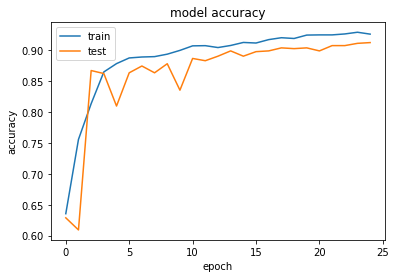

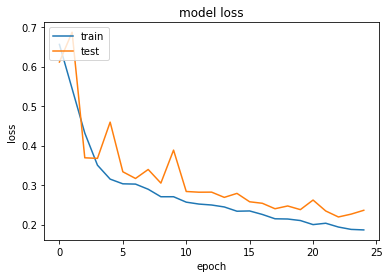

In [7]:
import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(model.history['accuracy'])
plt.plot(model.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss

plt.plot(model.history['loss'])
plt.plot(model.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()